¡Hola!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-scientist. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante. </b> <a class="tocSkip"></a>
Hola Tonatiuh, primero que nada gracias por revisar mi proyecto y hacerme las correcciones necesarias esto es algo que me ayuda a mejorar. 
Si aún tengo dudas sobre cómo manejar algunos datos y entre tanta teoría me resulta complicado recordar la información, pero con cada sprint voy recordando y aprendiendo cosas nuevas.
Me gustaría que por favor también me comentes si es correcto el método que use para la comprobación de las hipótesis ya que es una de las cosas que se me dificulta saber si hice bien. 
¡Gracias!
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Hola! Recuerda que para los ejercicio de análisis de datos es necesario desarrollar la introducción, objetivo y etapas de análisis. Esto es crucial para cualquier proyecto, ya que establece una guía clara sobre los pasos a seguir. Tener estos elementos bien definidos desde el principio nos permite trabajar de manera más organizada y eficiente. En un futuro lo podrías complementar con una tabla de contenido.
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo con los ajustes!
</div>

# Descripción del proyecto #

### Introducción

En los últimos años las ventas de videojuegos alrededor del mundo se ha vuelto algo popular pues muchas personas hacen uso de las diferentes plataformas en el mercado de los videojuegos, razón por la cual es importante investigar cómo se comportan dichas ventas. 

La característica principal de este análisis de datos es identificar el comportamiento de las ventas para futuros lanzamientos de nuevas plataformas. 

Para este análisis es necesario aplicar los conocimientos adquiridos en los sprints anteriores, como lo son el filtrado de datos, la representación de datos mediante gráficos, determinar correlaciones entre variables, así como  hacer uso de la estadística para la comprobación de hipótesis.

El análisis de las ventas de videojuegos se realiza con el interés de conocer que hace que haya más ventas en ciertas plataformas para poder hacer un pronóstico de ventas para el siguiente año, así como saber que tanto influyen las reseñas de usuarios y críticos en las ventas.

### Objetivo general
Realizar un pronóstico de ventas para el año 2017 basado en el análisis de los datos de años anteriores.


### Objetivos específicos
- Preparar los datos para el análisis, convirtiendo a los tipos de datos necesarios, tratando valores ausentes y duplicados.
- Calcular las ventas globales.
- Determinar un periodo de datos para el análisis. 
- Observar cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma.
- Analizar las ventas por región, plataformas y géneros más populares.
- Comprobación de hipótesis. 


## 1. Abrir el archivo de datos y estudiar la información general

In [2]:
# Importación de librerías
import pandas as pd
from pandas import pivot_table
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats as st

In [3]:
# Lectura del dataframe
df_games = pd.read_csv(
    "c:/Users/cary_/OneDrive/Escritorio/Data analyst/Sprint 6/games.csv")


<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Has realizado un excelente trabajo al importar los datos y las bibliotecas necesarias.

</div>

In [4]:
# Mostrar información del dataframe games
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


En la visualización general de los datos se puede observar que existen tipos de datos que no son adecuados para lo que almacenan, además se observa también que los nombres de las columnas están en mayúsculas y minúsculas. Será necesario cambiar los tipos de datos de algunas columnas asi como cambiar a minúsculas los nombres de las columnas. 

## 2. Preparación de los datos

In [5]:
# Impresión de muestra del dataframe
df_games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [6]:
# Se convierten los nombres de las columnas a minúsculas
df_games.columns = df_games.columns.str.lower()
print(df_games.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


In [7]:
# Para rellenar los valores ausentes de la columna year_of_release se calcula la media y la mediana
# Se puede observar que ambos valores son muy cercanos, en este caso se usará la mediana para rellenar los valores ausentes
# Ya que no hay como tal valores atípicos en esta columna
media = df_games['year_of_release'].mean()
mediana = df_games['year_of_release'].median()
print(media)
print(mediana)

2006.4846163200777
2007.0


In [8]:
# La columna year_of_release se debe convertir a tipo int y la columna user_score se debe pasar a tipo float pues son tipos de datos más adecuados
# Antes de hacer los cambios de tipo de datos es necesario llenar los valores ausente para que no marque algún error al momento de hacer la conversión
df_games['year_of_release'] = df_games['year_of_release'].fillna(mediana).astype('int')
df_games['user_score'] = pd.to_numeric(df_games['user_score'], errors='coerce')
# Las columnas numéricas se procede a llenarlas con 0 para poder trabajar con los datos y hacer los cálculos necesarios más adelante
df_games['user_score'] = df_games['user_score'].fillna(0)
df_games['critic_score'] = df_games['critic_score'].fillna(0)
# La columna tipo object se llenaran con la palabra unknown para que no existan datos ausentes en ninguna columna y se puedan hacer los filtrados de datos
df_games['name'] = df_games['name'].fillna('Unknown')
df_games['rating'] = df_games['rating'].fillna('Unknown')
# Se imprime nuevamente la info del dataframe para mostrar que no ya no hay datos ausentes y que se cambiaron los tipos de datos
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int32  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  float64
 9   user_score       16715 non-null  float64
 10  rating           16715 non-null  object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.3+ MB


<div class="alert alert-block alert-success">
    <b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Cuando trabajamos con distribuciones sesgadas se recomienda usar la mediana en lugar de la media  
</div>

<div class="alert alert-block alert-info">
    <b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
En ocasiones podemos completar los valores faltantes con información recaba mediante una investigación. Es muy común que cuando trabajamos con datos en la vida real, mucho de estos vengan con valores nulos que en ocasiones tendremos que completar con proxys
</div>

In [9]:
# Se revisa si existe algún valor duplicado
print('Duplicados totales: ', df_games.duplicated().sum())

Duplicados totales:  0


<div class="alert alert-block alert-success">
    <b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Como aprendiste en cursos anteriores, el análisis de registros duplicados es esencial en el análisis de datos para evitar que sesguen nuestros resultados.
</div>

In [10]:
# Se crea una nueva columna llamada total_sales donde se hace suma de las ventas de todas las regiones
df_games['total_sales'] = df_games['na_sales'] + \
    df_games['eu_sales'] + df_games['jp_sales'] + df_games['other_sales']
df_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,Unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,Unknown,31.38


<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Hola! Muy buen trabajo en la sección, ajustaste los nombres de las columnas a minúsculas con el uso de la función str.lower(), cambiaste el tipo de variable de dos de las variables de la base de datos, consideraste ajustar los valores ausentes de las variables identificadas de score y muy buen trabajo con la suma de todas las ventas. 
    
   

</div>

En esta parte se puede se realiza el cambio de las columnas de mayúsculas a minúsculas, así como el cambio de tipos de datos de algunas columnas. Para el caso de los valores ausentes en la columna year_of_release se realizó el cálculo de la media y la mediana, como no existen valores atípicos se usó la media para llenar los valores ausentes, no se pueden usar 0 para esta columna porque una vez que se empiezan a hacer los cálculos aparecerá que existen datos del año 0 lo cual no tiene sentido, por ello resulta mejor usar la media para llenar los valores ausentes.

En el caso de la columna user_score que tiene la abreviatura TBD se optó por cambiar el tipo de dato de la columna a numérico ya que este tipo de datos resulta más conveniente para realizar los cálculos, así mismo los valores ausentes se rellenaron con 0. 
 
Para la columna critic_score se llenaron los valores ausentes con 0, en el caso de las columnas name y rating se usó la palabra “Unknown”
para llenar los valores  ausentes. 

De igual manera se creó una nueva columna llamada total_sales que guarda la suma de las ventas de todas regiones, esto sirve para enriquecer los datos y servirá para poder hacer futuros cálculos. 

En todos los casos se optó por buscar la forma de llenar los valores ausentes ya que esto permitirá poder realizar los cálculos más adelante en el proyecto. 


## 3. Analizar datos

### 3.1 Juegos lanzados por año

<Axes: title={'center': 'Total de juegos vendidos al año'}, xlabel='Año', ylabel='Cantidad'>

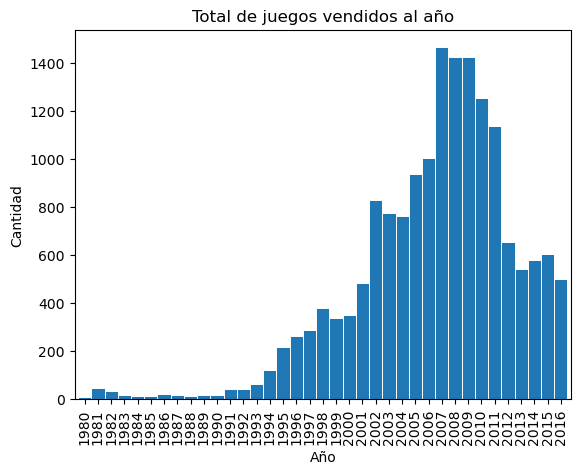

In [11]:
# Se puede observar que durante los años 2008 y 2009 se lanzaron aproximadamente 1400 juegos
games_per_year = df_games.groupby('year_of_release')['name'].count()
games_per_year.plot(kind='bar', title='Total de juegos vendidos al año',
                    xlabel='Año', ylabel='Cantidad', width=1, edgecolor="white", linewidth=0.7)

### 3.2 Ventas globales por plataforma al año

<Axes: xlabel='year_of_release', ylabel='platform'>

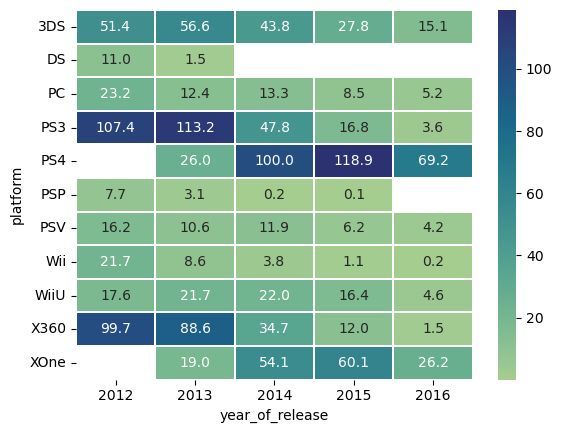

In [22]:
# Se toman los datos a partir de al año 2021
total_sales_platform_year = df_games[df_games['year_of_release'] >= 2012].pivot_table(index='platform', columns='year_of_release',
                                            values='total_sales', aggfunc='sum').sort_values(by='platform')
sns.heatmap(total_sales_platform_year, linewidths=0.01, cmap="crest", annot=True, annot_kws={"size": 10}, fmt='.1f')


En el heatmap creado se toman los datos a partir del año 2012 para observar cómo han ido las ventas durante ese periodo y así tener una visión más clara de que se puede vender en el año 2017. Las plataformas con mayores ventas son PS3, PS4 seguidos de Xbox360 y XboxOne, mostrando un color más oscuro comparado con las demás. Así mismo se observa que las ventas son más altas cuando la plataforma recién sale al mercado y las ventas tienden a ir disminuyendo cuando se saca una nueva versión de alguna de ellas. Para el año 2017 se pueden sacar nuevas versiones de las plataformas para que se sigan manteniendo vigentes en el mercado.

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Gran trabajo con el desarrollo de la gráfica. Solamente te recomendaría que intentes reducir el periodo dado que el perido actual puede resultar muy extenso. Recordemos que con base en la información la popularidad la alcanzan en los primeros años. Es por ello que con un periodo largo puede no ser posible analizar de forma clara las plataformas y videojuegos actualizados y podrías estar analizando los desactualizados. Es por ello y dado que buscamos responder qué vender en 2017 te recomendareia gráficar un periodo que no supere los 5 años.     

</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Gran trabajo con los ajustes!    

</div>

### 3.3 Ventas globales por plataforma

<Axes: title={'center': 'Ventas totales por plataforma'}, xlabel='Plataforma', ylabel='Ventas en MDD'>

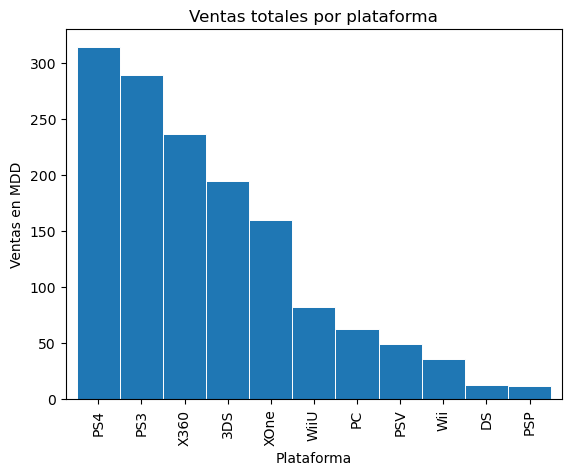

In [23]:
# En esta gráfica se puede observar que las plataformas que más ventas han tenido son: PS2, XBOX360, PS3, Wii, DS y PS, las líderes en ventas
# Esto apartir del año 2000 que fue la fecha qye se tomo
up_total_sales = df_games[df_games['year_of_release'] >= 2012].groupby('platform')['total_sales'].sum().sort_values(ascending=False)
up_total_sales.plot(kind='bar', title='Ventas totales por plataforma',
                    xlabel='Plataforma', ylabel='Ventas en MDD', width=1, edgecolor="white", linewidth=0.7)

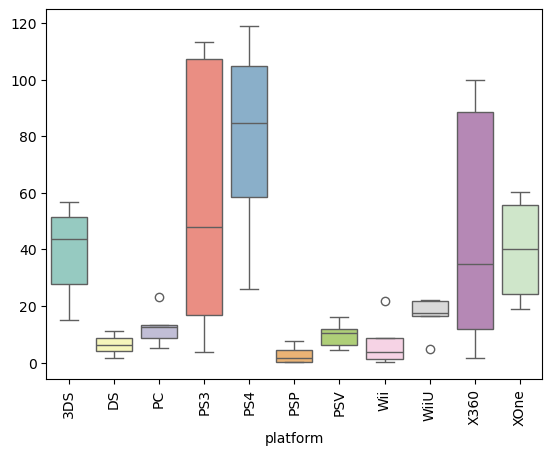

In [24]:
# Creación de diagrama de caja para mostrar las ventas globales a partir del año 2012 por plataforma.
boxplot_sales = sns.boxplot(data=total_sales_platform_year.T, palette = "Set3")
boxplot_sales.tick_params(axis='x', rotation=90)

<div class="alert alert-block alert-warning">
    <b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Recuerda que los graficos de box-plot nos ayudan a identificar outliers que posteriomente en el desarrollo de las pruebas de hipótesis nos servirían eliminar para que no puedan sesgar nuestros resultados. 
</div>

Los bigotes de los valores mínimo y máximo en el diagrama de cajas se colocan en 0.1 y 107.4. Se observan algunos valores atípicos en donde PC y Wii tienen valores que superan el máximo, mientras que WiiU tiene un valor atípico por debajo de su valor mínimo.

DS y Xbox 360 parecer ser las únicas que muestran una distribución normal en sus datos, mientras que las demás plataformas muestra sesgos en sus distribuciones.

<Axes: title={'center': 'Ventas totales por plataforma'}, xlabel='Plataforma', ylabel='Ventas en MDD'>

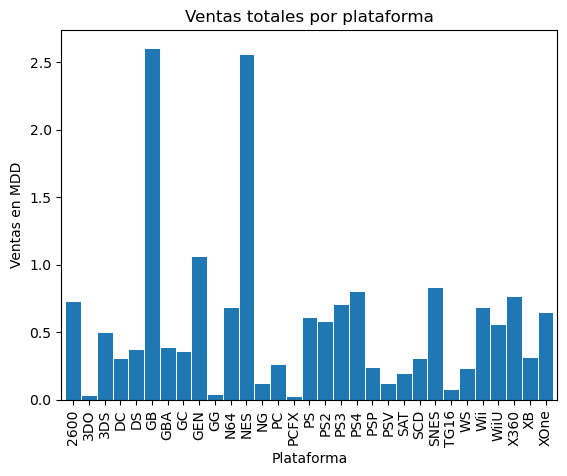

In [25]:
# Ventas globales promedio por plataforma
# Se observa que GB y NES son los que encabezan la lista
mean_total_sales = df_games.groupby('platform')['total_sales'].mean()
mean_total_sales.plot(kind='bar', title='Ventas totales por plataforma',
                    xlabel='Plataforma', ylabel='Ventas en MDD', width=1, edgecolor="white", linewidth=0.7)

### 3.4 Cálculo del coeficiente de correleación entre las reseñas de usuarios y críticos  

Coeficiente de correlación entre las ventas de PS2 y las reseñas de los usuarios: 0.17286551112058182


<Axes: title={'center': 'Coeficiente de correlación entre ventas de PS2 y reseñas de usuarios'}, xlabel='user_score', ylabel='total_sales'>

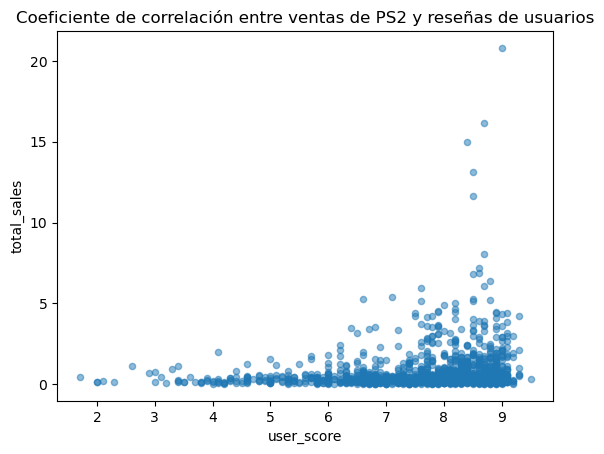

In [ ]:
# Cálculo del coeficiente de correlación entre las ventas y las reseñas de los usuarios
# Se selecciono la plataforma PS2 para hacer este cálculo
user_score_platform_ps2 = df_games.query("platform == 'PS2' and user_score != 0")[
    ['user_score', 'total_sales']]
corr_user_score_ps2 = user_score_platform_ps2['user_score'].corr(
    user_score_platform_ps2['total_sales'])
print('Coeficiente de correlación entre las ventas de PS2 y las reseñas de los usuarios:', corr_user_score_ps2)
user_score_platform_ps2.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.5,
                         title='Coeficiente de correlación entre ventas de PS2 y reseñas de usuarios')

Coeficiente de correlación entre las ventas de PS2 y las reseñas de los críticos:  0.3954345494545488


<Axes: title={'center': 'Coeficiente de correlación entre ventas de PS2 y reseñas de críticos'}, xlabel='critic_score', ylabel='total_sales'>

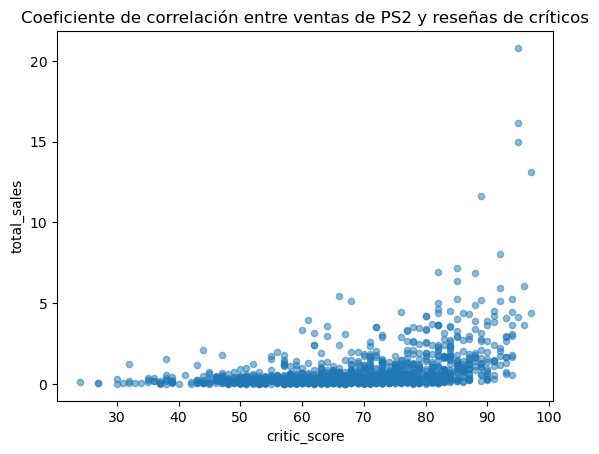

In [ ]:
# Cálculo del coeficiente de correlación entre las ventas de PS2 y las reseñas de los críticos.
critic_score_platform_ps2 = df_games.query("platform == 'PS2' and critic_score != 0")[['critic_score', 'total_sales']]
corr_critic_score_ps2 = critic_score_platform_ps2['critic_score'].corr(critic_score_platform_ps2['total_sales'])
print('Coeficiente de correlación entre las ventas de PS2 y las reseñas de los críticos: ', corr_critic_score_ps2)
critic_score_platform_ps2.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.5, title='Coeficiente de correlación entre ventas de PS2 y reseñas de críticos')

<div class="alert alert-block alert-success">
    <b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Muy buen trabajo con el análisis de la relación estre las scores y las ventas. 
</div>

De acuerdo al cálculo de la correlación entre las ventas y reseñas de los usuarios se observa que existe una correlación positiva de 0.26 no tan cercana a 1, lo cual significa que las reseñas de los usuarios no afectan tanto a las ventas de PS2.

En cuanto al cálculo de la correlación entre ventas y reseñas de los críticos el resultado fue de 0.30, también existe una correlación positiva sin embargo sigue siendo poco cercano a uno, con lo cual se puede concluir que las reseñas de los críticos tampoco afectan mucho en las ventas de la plataforma PS2.


Coeficiente de correlación entre las ventas globales y las reseñas de los usuarios: 0.13631521994197804


<Axes: title={'center': 'Coeficiente de correlación entre ventas globales y reseñas de usuarios'}, xlabel='user_score', ylabel='total_sales'>

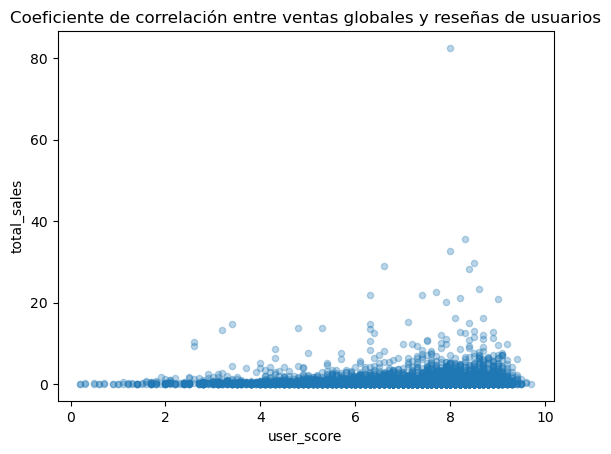

In [ ]:
# Cálculo del coeficiente de correlación entre las ventas globales y las reseñas de los usuarios.
corr_user_score = df_games['user_score'].corr(df_games['total_sales'])
print('Coeficiente de correlación entre las ventas globales y las reseñas de los usuarios:', corr_user_score)
df_games[df_games['user_score'] != 0].plot(x='user_score', y='total_sales', kind='scatter', alpha=0.3,
                         title='Coeficiente de correlación entre ventas globales y reseñas de usuarios')


Coeficiente de correlación entre las ventas globales y las reseñas de los críticos:  0.1486373734633437


<Axes: title={'center': 'Coeficiente de correlación entre ventas globales y reseñas de críticos'}, xlabel='critic_score', ylabel='total_sales'>

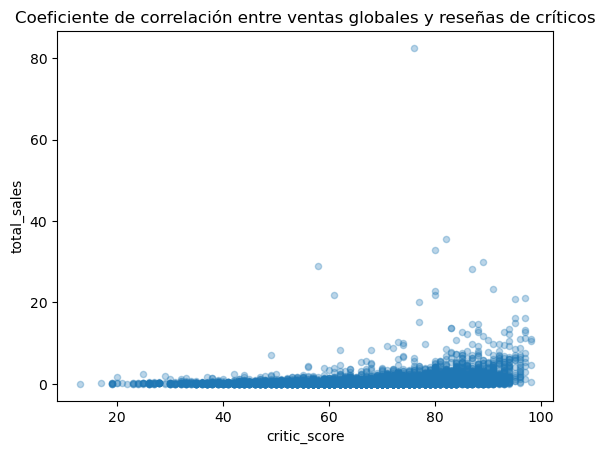

In [ ]:
# Cálculo del coeficiente de correlación entre las ventas globales y las reseñas de los críticos.
corr_critic_score = df_games['critic_score'].corr(df_games['total_sales'])
print('Coeficiente de correlación entre las ventas globales y las reseñas de los críticos: ', corr_critic_score)
df_games[df_games['critic_score'] != 0].plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.3,
                         title='Coeficiente de correlación entre ventas globales y reseñas de críticos')

Teniendo en cuenta los resultados anteriores, se puede observar que en las ventas globales del resto de las plataformas existe una correlación positiva aun menos cercana a uno y con esta información se puede concluir que tanto las reseñas de los usuarios como los críticos influyen poco en las ventas. 


### 3.5 Ventas globales por género

<Axes: title={'center': 'Ventas totales por género'}, xlabel='Género', ylabel='Ventas en MDD'>

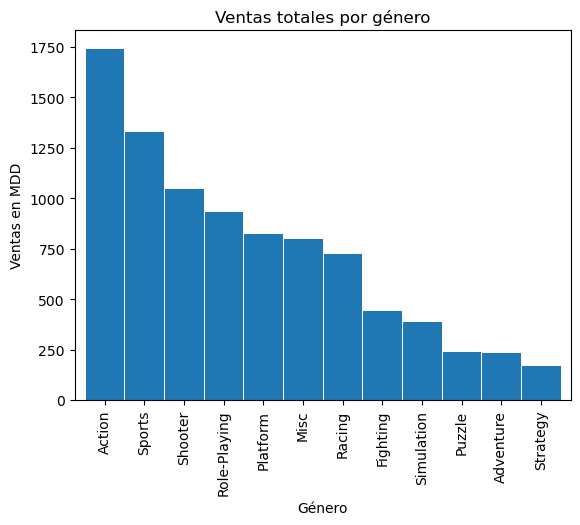

In [ ]:
# Cálculo de las ventas globales por género
genre_total_sales = df_games.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
genre_total_sales.plot(kind='bar', title='Ventas totales por género',
                    xlabel='Género', ylabel='Ventas en MDD', width=1, edgecolor="white", linewidth=0.7)

Se puede observar que el género con las mejores ventas es el Action, lo cual significa que es uno de los más rentables por lo tanto se puede generalizar que es uno de los más populares. Por otro lado, Strategy es uno de los géneros menos rentables pues cuenta con las ventas más bajas, así que podría decirse que es poco popular. 

## 4. Crea un perfil de usuario para cada región

### 4.1 Ventas por plataforma en cada región

<Axes: ylabel='platform'>

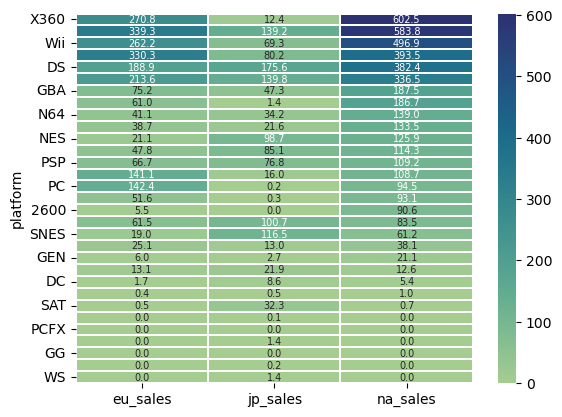

In [ ]:
# Ventas por plataforma en cada una de las regiones
region_sales = pd.pivot_table(df_games, values=['na_sales', 'eu_sales', 'jp_sales'],
                              index='platform', aggfunc="sum").sort_values(by='na_sales',  ascending=False)
sns.heatmap(region_sales, linewidths=0.01, cmap="crest", annot=True, annot_kws={"size": 7}, fmt='.1f')

En este heatmap se puede observar que la región donde mayores ventas existen es en NA, seguida de EU y JP. La mayor venta de NA supera por casi el triple a la venta en JP mientras que EU la supera por casi el doble. 

En NA y EU las plataformas son las 5 principales en ventas son casi las mismas, mientras que en JP hay diferencias notables en cuanto a las ventas pues la única similitud encontrada es PS que coincide con EU. PS2 es la única plataforma que es popular en todas las regiones.


<Axes: title={'center': 'Ventas en NA por plataforma'}, xlabel='Plataforma', ylabel='Ventas en MDD'>

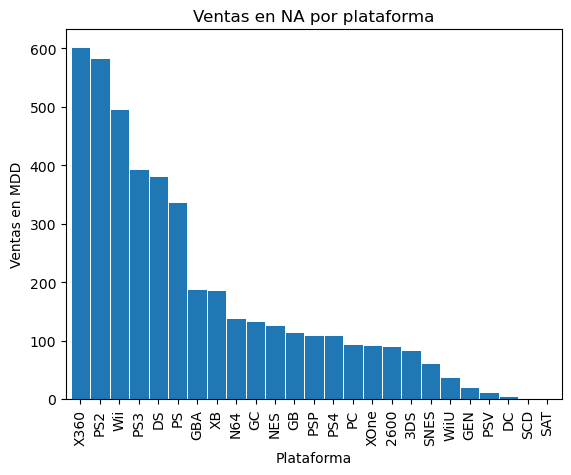

In [ ]:
# Ventas por plataforma en NA
na_sales = df_games[df_games['na_sales']!= 0].groupby('platform')['na_sales'].sum().sort_values(ascending=False)
na_sales.plot(kind='bar', title='Ventas en NA por plataforma',
                    xlabel='Plataforma', ylabel='Ventas en MDD', width=1, edgecolor="white", linewidth=0.7)

Las plataformas con más ventas en NA son: Xbox360, PS2, Wii, PS3 y DS

<Axes: title={'center': 'Ventas en EU por plataforma'}, xlabel='Plataforma', ylabel='Ventas en MDD'>

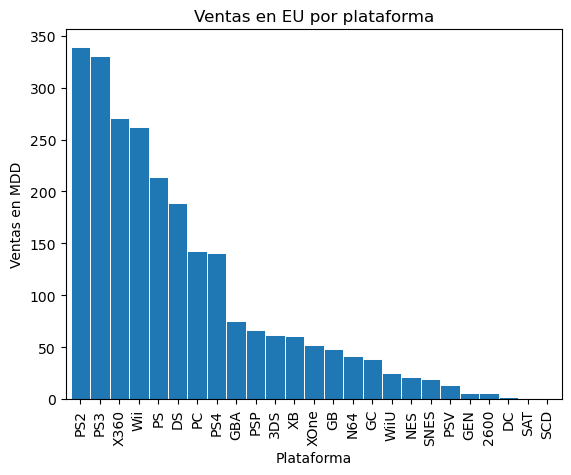

In [ ]:
# Ventas por plataforma en EU
eu_sales = df_games[df_games['eu_sales'] != 0].groupby('platform')['eu_sales'].sum().sort_values(ascending=False)
eu_sales.plot(kind='bar', title='Ventas en EU por plataforma',
                    xlabel='Plataforma', ylabel='Ventas en MDD', width=1, edgecolor="white", linewidth=0.7)

Las plataformas con más ventas en EU son: PS2, PS3, Xbox360, Wii y PS

<Axes: title={'center': 'Ventas en JP por plataforma'}, xlabel='Plataforma', ylabel='Ventas en MDD'>

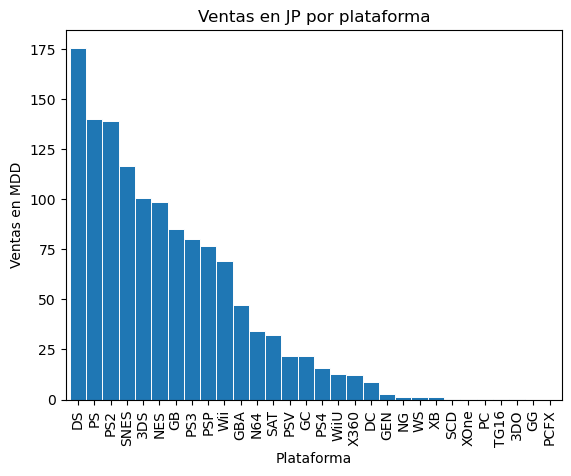

In [ ]:
# Ventas por plataforma en JP
jp_sales = df_games[df_games['jp_sales']!=0].groupby('platform')['jp_sales'].sum().sort_values(ascending=False)
jp_sales.plot(kind='bar', title='Ventas en JP por plataforma',
                    xlabel='Plataforma', ylabel='Ventas en MDD', width=1, edgecolor="white", linewidth=0.7)


Las plataformas con más ventas en JP son: DS, PS, PS2, SNES y 3DS

### 4.2 Ventas por género en cada región

<Axes: ylabel='genre'>

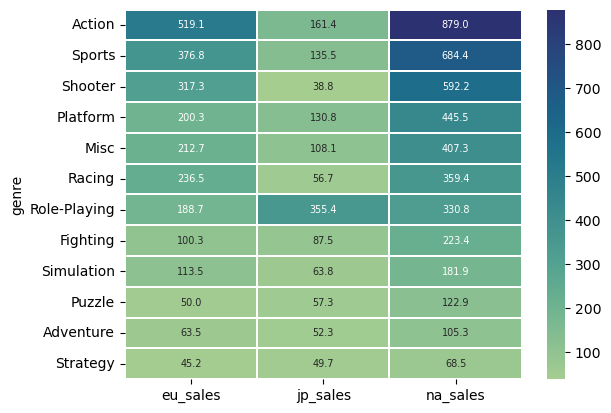

In [ ]:
# Ventas por género en cada una de las regiones
genre_sales = pd.pivot_table(df_games, values=['na_sales', 'eu_sales', 'jp_sales'],
                              index='genre', aggfunc="sum").sort_values(by='na_sales',  ascending=False)
sns.heatmap(genre_sales, linewidths=0.01, cmap="crest", annot=True, annot_kws={"size": 7}, fmt='.1f')

En este heatmap se puede observar que existen ventas bastante significativas en NA para el género de Action, aunque para NA y EU este mismo género es el más popular NA supera las ventas por más de 300 millones. Mientras que para JP el género más popular es Role-Playing con ventas de 355.4 millones  


En cuanto a los 5 géneros más populares en cada región se observó que existen más similitudes en cuanto a la popularidad de los géneros. Action, Sports y Misc son populares en todas las regiones.


<Axes: title={'center': 'Ventas por género en NA'}, xlabel='Género', ylabel='Ventas en MDD'>

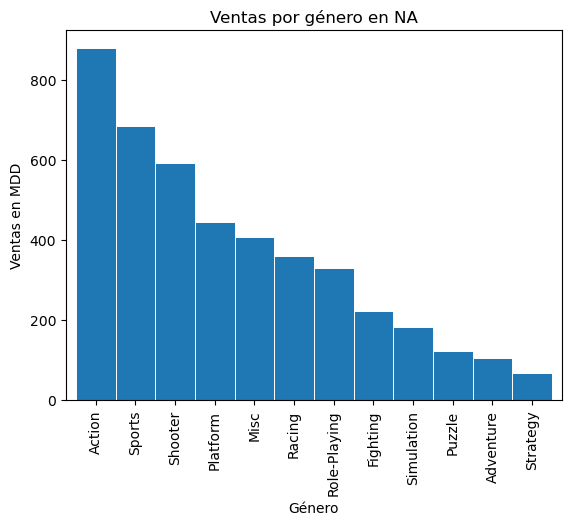

In [ ]:
# Ventas por género en NA
na_genre = df_games[df_games['na_sales'] !=0 ].groupby('genre')['na_sales'].sum().sort_values(ascending=False)
na_genre.plot(kind='bar', title='Ventas por género en NA',
                    xlabel='Género', ylabel='Ventas en MDD', width=1, edgecolor="white", linewidth=0.7)

Los géneros con más ventas en NA son: Action, Sports, Shooter, Platform y Misc. 

<Axes: title={'center': 'Ventas por género en EU'}, xlabel='Género', ylabel='Ventas en MDD'>

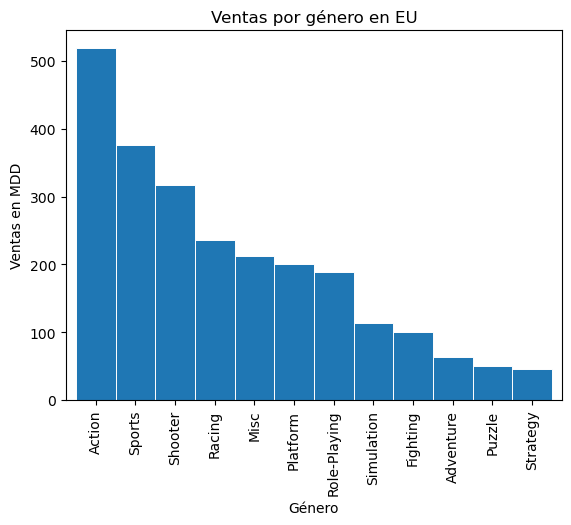

In [ ]:
# Ventas por género en EU
eu_genre = df_games[df_games['eu_sales']!=0].groupby('genre')['eu_sales'].sum().sort_values(ascending=False)
eu_genre.plot(kind='bar', title='Ventas por género en EU',
                    xlabel='Género', ylabel='Ventas en MDD', width=1, edgecolor="white", linewidth=0.7)

Los géneros con más ventas en EU son: Action, Sports, Shooter, Racing y Misc. 

<Axes: title={'center': 'Ventas por género en JP'}, xlabel='Género', ylabel='Ventas en MDD'>

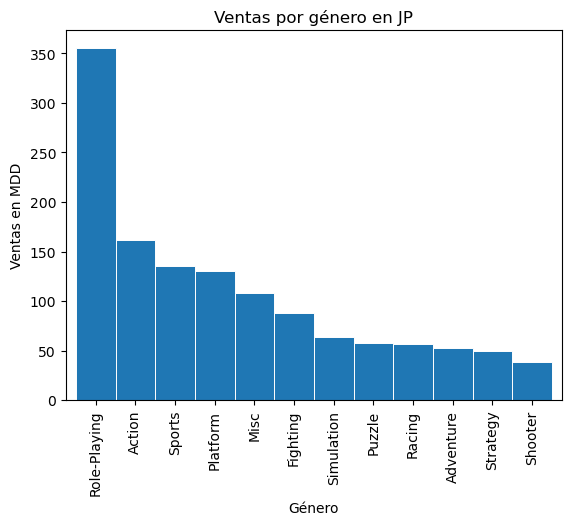

In [ ]:
# Ventas por género en JP
jp_genre = df_games.groupby('genre')['jp_sales'].sum().sort_values(ascending=False)
jp_genre.plot(kind='bar', title='Ventas por género en JP',
                    xlabel='Género', ylabel='Ventas en MDD', width=1, edgecolor="white", linewidth=0.7)

Los géneros con más ventas en JP son: Role-Playing, Action, Sports, Platform y Misc. 

### 4.3 Ventas por clasificación en cada región

<Axes: ylabel='rating'>

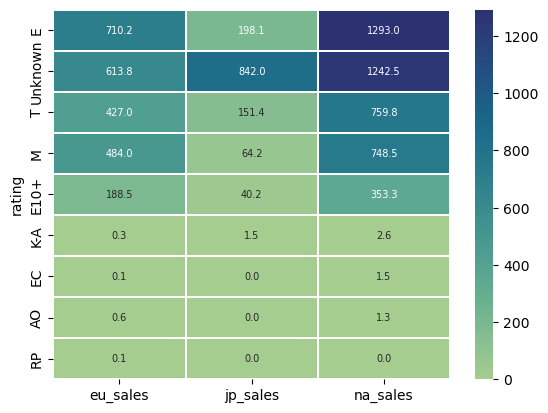

In [ ]:
#Ventas por clasificación en cada una de las regiones
rating_sales = pd.pivot_table(df_games, values=['na_sales', 'eu_sales', 'jp_sales'],
                              index='rating', aggfunc="sum").sort_values(by='na_sales',  ascending=False)
sns.heatmap(rating_sales, linewidths=0.01, cmap="crest", annot=True, annot_kws={"size": 7}, fmt='.1f')

Se observa que NA es líder en ventas con la clasificación “E” seguido de JP y EU, tanto NA como EU tienen “E”  como la clasificación más popular en ventas, mientras que en JP “Unknown” es el que más ventas tiene.

Las clasificaciones más populares para todas las regiones son: E, T, M y E10 +.


<Axes: title={'center': 'Ventas por clasificación en NA'}, xlabel='Clasificación', ylabel='Ventas en MDD'>

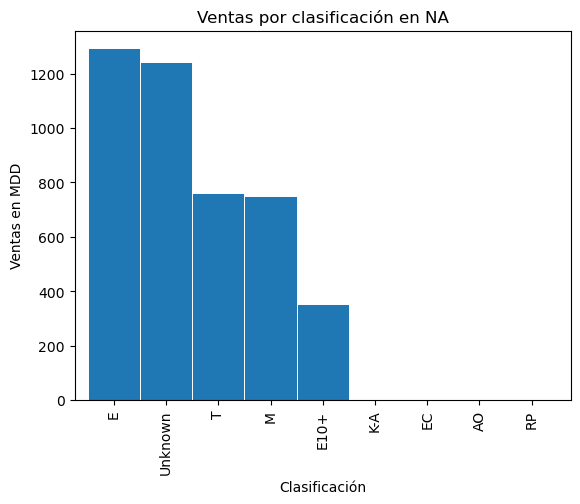

In [ ]:
# Ventas por clasificación  en NA
rate_na = df_games.groupby('rating')['na_sales'].sum().sort_values(ascending=False)
rate_na.plot(kind='bar', title='Ventas por clasificación en NA',
                    xlabel='Clasificación', ylabel='Ventas en MDD', width=1, edgecolor="white", linewidth=0.7)

Las clasificaciones con más ventas en NA son: E, T, M, E10+ y K-A.



<Axes: title={'center': 'Ventas por clasificación en EU'}, xlabel='Clasificación', ylabel='Ventas en MDD'>

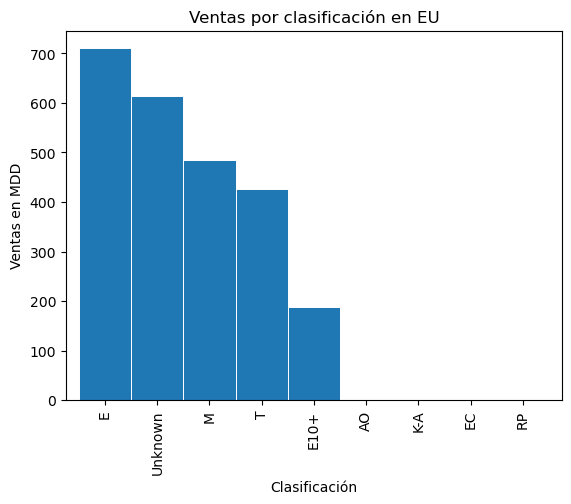

In [ ]:
# Ventas por clasificación  en EU
rate_eu = df_games.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
rate_eu.plot(kind='bar', title='Ventas por clasificación en EU',
                    xlabel='Clasificación', ylabel='Ventas en MDD', width=1, edgecolor="white", linewidth=0.7)

Las clasificaciones con más ventas en EU son: E, Unknown, M, T y E10+.

<Axes: title={'center': 'Ventas por clasificación en JP'}, xlabel='Clasificación', ylabel='Ventas en MDD'>

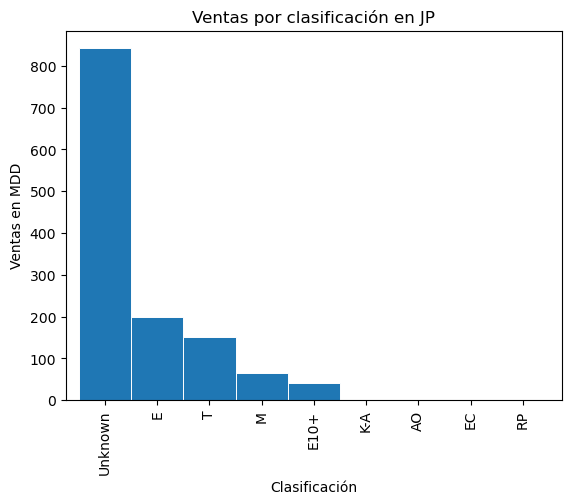

In [ ]:
# Ventas por clasificación  en JP
rate_jp = df_games.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)
rate_jp.plot(kind='bar', title='Ventas por clasificación en JP',
                    xlabel='Clasificación', ylabel='Ventas en MDD', width=1, edgecolor="white", linewidth=0.7)

Las clasificaciones con más ventas en JP son: Unknown, E, T, M y E10+.

## 5. Prueba de hipótesis

Ambas hipótesis se formularon en base a un parámetro de distribución que en este caso es la media de dos poblaciones estadísticas, en este caso las calificaciones promedio de los usuarios. La hipótesis nula para expresar que no existen diferencias entre las poblaciones, en otras palabras para afirmar que los valores obtenidos están dentro del rango esperado, para este caso las calificaciones promedio de los usuarios. La hipótesis alternativa se formuló en base a la hipótesis nula para comprobar lo contrario, es decir que pudieran existir valores fuera del rango.

Para probar qué hipótesis es verdadera se utilizara la hipótesis sobre la igualdad de las medias de dos poblaciones, que sirve para comparar las medias de dos poblaciones. En este caso son las calificaciones promedio para dos diferentes plataformas y calificaciones promedio para dos diferentes géneros.  

Para el valor se establecerá en 5% porque los valores de umbral convencional son de 5% y 1%.


### 5.1 Formulación de hipótesis para las plataformas XboxOne y PC
#### Hipótesis alternativa: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.
#### Hipótesis nula: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC no son las mismas.

In [ ]:
# Comprobación de hipótesis
rate_users_xbox_one = df_games.query("platform == 'XOne'")[['user_score']]
rate_users_pc = df_games.query("platform == 'PC'")[['user_score']]

alpha = 0.05

results_platform = st.ttest_ind(rate_users_xbox_one, rate_users_pc)
print('Valor p: ', results_platform.pvalue)

if results_platform.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")


Valor p:  [0.00058334]
Rechazamos la hipótesis nula


### 5.2 Formulación de hipótesis para los géneros de Acción y Deportes
#### Hipótesis alternativa: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.
#### Hipótesis nula: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes no son diferentes.

In [ ]:
# Comprobación de hipótesis
rate_users_action = df_games.query("genre == 'Action'")[['user_score']]
rate_users_sports = df_games.query("genre == 'Sports'")[['user_score']]

alpha = 0.05

results_genre = st.ttest_ind(rate_users_action, rate_users_sports)
print('Valor p: ', results_genre.pvalue)

if results_genre.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")


Valor p:  [1.19440138e-08]
Rechazamos la hipótesis nula


 <div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Para estas pruebas te recomiendo hacer una prueba de  Levene  para mostrar si las varianzas son iguales y agregarlo dentro de la función. Actualmente lo colocar como equal_var=True. Para esto, primero debes calcular las varianzas para cada uno de las plataformas y en un segundo tiempo debes de hacer uso de la siguiente función: 
    
    levene(xbox_one_data['user_score'], pc_data['user_score'])
    
Adoptaremos un nivel de significancia de 0.05; si el valor p resultante es mayor a 0.05, no podemos rechazar la hipótesis nula, y si es menor a 0.05, rechazamos la hipótesis nula, indicando que las varianzas no son iguales. 
    
Solamente recuerda que la prueba de levene no es sustituto a la prueba de st.ttest_ind, más bien es complemento para saber que colocar dentro del elemento "equal_var". En este caso como rechazamos la hipótesis de varianzas iguales debemos de colocar False. Es por eso que para terminar la prueba debes de realizar la prueba de st.ttest_ind considernado el resultado de la prueba realizada de levene    
</div>

## 6. Conclusión general

En este proyecto integrado se ha realizado la práctica de lo aprendido en los 5 sprints anteriores, lo cual me ha resultado enriquecedor para recordar tanto temas prácticos como teóricos. Aprendí nuevas formas de representar los datos usando heatmap, así como nuevos formatos que mejoran la presentación de los gráficos realizados. Aplique teoría que no había usado en ateriostes proyectes como es el cálculo de la correlación y una también aplique un método que no había usado antes para la comprobación de las hipótesis.


Este proyecto me ha permitido reforzar los conocimientos aprendidos de los sprints anteriores, esto es fundamental ya que la constante práctica me permite seguir mejorando.


 <div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Muy buen trabajo con los ajustes!  Que sigas disfrutando los siguientes cursos!
</div>